## OAA Zadaća 
Primljena : 14.12.2020 10:51

Rok:        29.12.2020 10:51

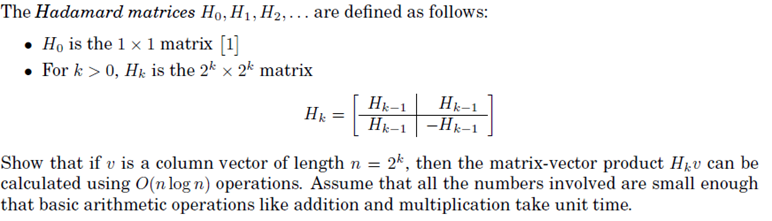

Biblioteke potrebne za rad programa

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,15


Pomoćna funkcija koja H pretvara u veću Hadamarovu matricu ,koja ima dimenziju = 2*dim(H)

In [2]:
#povecaj(np.array([[1]]))
def povecaj(H):
    return np.bmat([[H, H], [H, -H]])

### Iterativna varijanta

Potrebno je samo proslijediti vektor v dimenzije 2**k

Npr. pomnoziFast( [1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0] )

Vraća: izračunati vektor i broj urađenih operacija

In [3]:
def pomnoziFast(v) -> None:
    h = 1
    T=0
    l=len(v)
    
    while h < l:                        #h ~ dubina
        for i in range(0, l, h * 2):    #i ~ pojedina matrica
            for j in range(i, i + h):   #j ~ redak matrice i  
                x = v[j]
                y = v[j + h]
                v[j] = x + y
                v[j + h] = x - y
                T=T+2                   #broj operacija,posto su to operacije nad integerima
                
        h *= 2
    return v,T

### Rekurzivna varijanta
Uzima Hadamarovu matricu H i vektor v

Vraća:izračunat vektor v i broj izvršenih operacija T

In [4]:
def pomnozi(H,v):
    if len(v)==1:
        return [v,0]
    
    p = len(H)//2                #nova dimenzija podmatrice  
    G = H[0:p,0:p]               #nova podmatrica
    c = np.array_split(v, 2)     #podijeli vektor na dvije polovice
    
    y0,cost0= pomnozi(G,c[0])    #posalji podmatricu s prvom  polovicom vekt.
    y1,cost1= pomnozi(G,c[1])    #posalji podmatricu s drugom polovicom vekt.
    
    additionCost = len(y0)                          #cijena operacija u trenutnom koraku
    ukupanCost = cost0+cost1+2*additionCost +0.1    #ukupna cijena operacija koju zelim vratiti
    
    rez=np.concatenate((                            #rezultat je vektor oblika (y0+y1,y0-y1)
        np.add(y0 , y1),
        np.subtract(y0, y1)
    ))
    
    return rez,ukupanCost
    

### Klasični algoritam za računanje produkta matrice i vektora
Uzima matricu H i vektor v

Vraća:izračunat vektor v i broj izvršenih operacija T

In [5]:
def pomnoziSlow(H,v):
    N=len(H)
    T=0
    res=np.zeros(N)
    
    for j in range(N):                    
        for i in range(N):
            res[j]= res[j] + H[j,i]*v[i]
            T += 1
            
    return res,T

### Testiranje vremena i koraka izvšavanja pojedinih varijanti

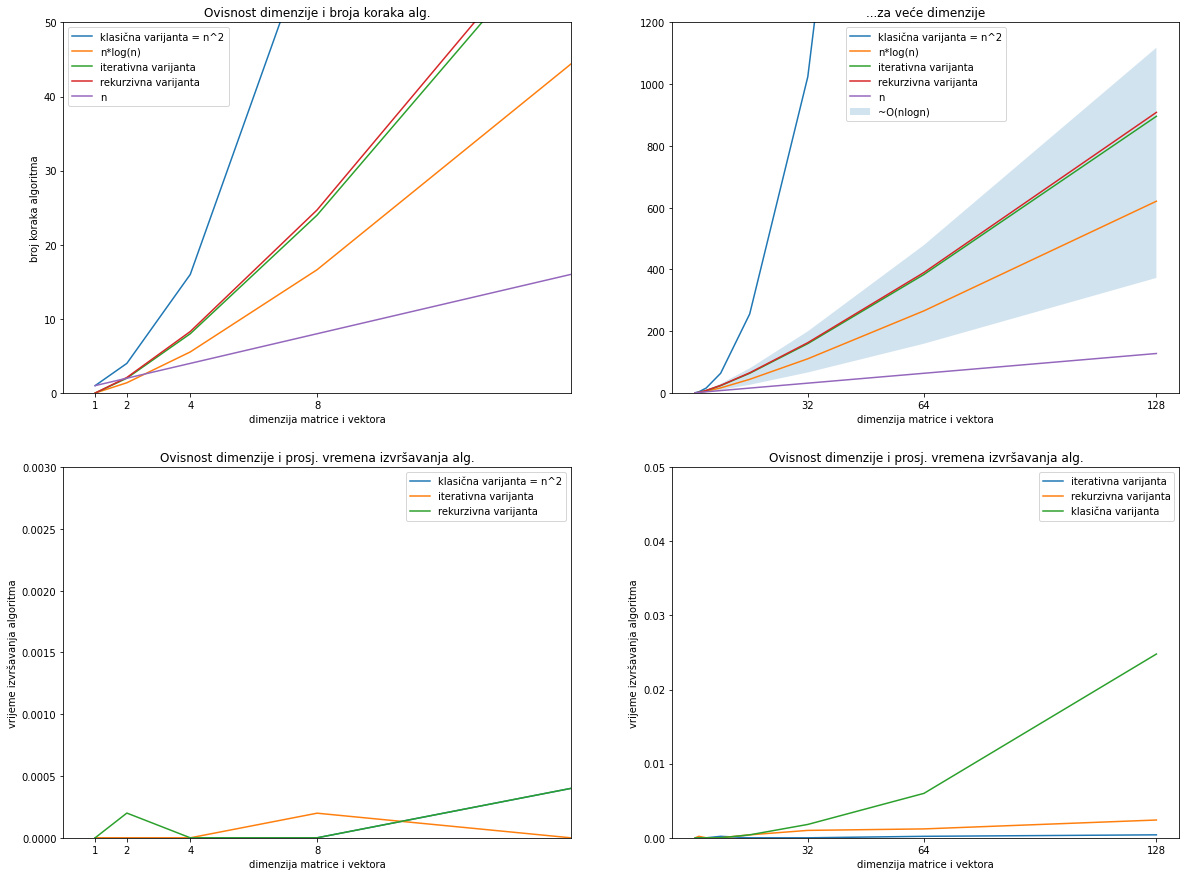

In [17]:

np.seterr(all='warn')
doDim= 8                                 #zeljena dimenzija do koje se racuna 2**doDim

#x os= stupnjevi matrica
x = [2**i for i in list(range(doDim))]   #sadrzi dimenzije :[1,2,4,8,... ,2**(doDim-1)]

steps     =   list(range(doDim))  #sadrzi korake za rekurz.varijantu
stepsIter =   list(range(doDim))  #sadrzi korake za iter.varijantu
stepsSlow =   list(range(doDim))  #sadrzi korake za klasicnu varijantu
timeRec   =   list(range(doDim))  #sadrzi vrijeme izvrs. za rekurz.varijantu
timeIter  =   list(range(doDim))  #sadrzi vrijeme izvrs. za iter.varijantu
timeSlow  =   list(range(doDim))  #sadrzi vrijeme izvrs. za klasicnu varijantu
 
vals=np.random.randint(40, size=2**(doDim-1), dtype=np.int64)   
#sadrzi array random brojeva od 0 do 20 ,dimenzije: 2**(doDim-1)

H=np.array([[1]], dtype=np.int64)
#pocinjemo s matricom dim=1

brRep=5             #broj repeticija za testiranje vremena
i=0                 #pomocna varijabla

for p in x:
    vals=np.random.randint(40, size=2**(doDim-1), dtype=np.int64)   
    
    #testiranje rekurzivne varijante
    start = time.time()
    for j in range(brRep):          #test vremena
        res,T=pomnozi(H,vals[0:p])
    end = time.time() 
    steps[i]=T                      #spremi broj koraka
    timeRec[i]=(end - start)/brRep  #spremi vrijeme
    
    
    #testiranje iterativne varijante    
    start = time.time()
    for j in range(brRep):          #test vremena
        res,T=pomnoziFast(vals[0:p])
    end = time.time() 
    stepsIter[i]=T                  #spremi broj koraka
    timeIter[i]=(end - start)/brRep #spremi vrijeme
    
    
    #testiranje klacicne varijante
    start = time.time()                
    for j in range(brRep):           #test vremena
        res,T=pomnoziSlow(H,vals[0:p])
    end = time.time() 
    stepsSlow[i]=T                   #spremi broj koraka
    timeSlow[i]=(end - start)/brRep  #spremi vrijeme
    
    
    H=povecaj(H)                     #povecaj dimenziju od H
    i+=1
    
     
plt.subplot(2, 2, 1)
plt.title("Ovisnost dimenzije i broja koraka alg.")
plt.xticks(x[:4])
plt.ylabel('broj koraka algoritma')
plt.xlabel('dimenzija matrice i vektora')
plt.xlim(0, x[4])
plt.ylim(0, 50)
plt.plot(x,stepsSlow,        label="klasična varijanta = n^2")
plt.plot(x,x*np.log(x),      label="n*log(n)")
plt.plot(x,stepsIter,        label="iterativna varijanta")
plt.plot(x,steps,            label="rekurzivna varijanta")

plt.plot(x,np.multiply(1,x), label="n")
plt.legend()

plt.subplot(2, 2, 2) 
plt.title("...za veće dimenzije")
plt.xlabel('dimenzija matrice i vektora')
plt.xticks(x[5:])
plt.ylim(0, 1200)
plt.plot(x,stepsSlow,        label="klasična varijanta = n^2")
plt.plot(x,x*np.log(x),      label="n*log(n)")
plt.plot(x,stepsIter,        label="iterativna varijanta")
plt.plot(x,steps,            label="rekurzivna varijanta")
plt.plot(x,np.multiply(1,x), label="n")
plt.fill_between(x,np.multiply(1.8,x)*np.log(x),np.multiply(0.6,x)*np.log(x),alpha=0.2,label="~O(nlogn)")
plt.legend()

plt.subplot(2, 2, 3)
plt.title("Ovisnost dimenzije i prosj. vremena izvršavanja alg.")
plt.xticks(x[:4])
plt.xlim(0, x[4])
plt.ylim(0,0.003)
plt.ylabel('vrijeme izvršavanja algoritma')
plt.xlabel('dimenzija matrice i vektora')
plt.plot(x,timeSlow,  label="klasična varijanta = n^2")
plt.plot(x,timeIter,  label="iterativna varijanta")
plt.plot(x,timeRec,   label="rekurzivna varijanta")

plt.legend()


plt.subplot(2, 2, 4)
plt.title("Ovisnost dimenzije i prosj. vremena izvršavanja alg.")
plt.ylabel('vrijeme izvršavanja algoritma')
plt.xlabel('dimenzija matrice i vektora')
plt.xticks(x[5:])
plt.ylim(0,0.05)
plt.plot(x,timeIter,  label="iterativna varijanta")
plt.plot(x,timeRec,   label="rekurzivna varijanta")
plt.plot(x,timeSlow,  label="klasična varijanta")
plt.legend()

plt.show()
